In [62]:
import numpy as np

states = {'dort': 0, 'dehors': 1, 'manger': 2}

#matrice_passage
P = np.array([
    [1/10, 2/10, 7/10], # de "dort"
    [0/10, 4/10, 6/10], # de "dehors" 
    [1/10, 4/10, 5/10]])  # fderom "manger"

# fonction de simulation
def simulate_rabbit_movements(initial_state, num_steps):
    current_state = initial_state
    state_history = [current_state]

    for _ in range(num_steps - 1):
        current_state = np.random.choice(list(states.values()), p=P[current_state])
        state_history.append(current_state)

    return state_history

# Définition des pas de temps
times = {
    'une_heure': 60,
    'un_jour': 60 * 24,
    'quainze_jours': 60 * 24 * 15,
    'un_mois': 60 * 24 * 30
}

# simulations pour différents pas de temps
simulations = {}
for time_span, num_steps in times.items():
    # on assume que le lapin commence à un état aléatoire
    initial_state = np.random.choice(list(states.values()))
    simulations[time_span] = simulate_rabbit_movements(initial_state, num_steps)

# Calcul des fréquences pour chaque état
empirical_frequencies = {time_span: {state_name: states_history.count(state) / len(states_history)
                                     for state_name, state in states.items()}
                         for time_span, states_history in simulations.items()}

empirical_frequencies


{'une_heure': {'dort': 0.11666666666666667,
  'dehors': 0.35,
  'manger': 0.5333333333333333},
 'un_jour': {'dort': 0.05347222222222222,
  'dehors': 0.39166666666666666,
  'manger': 0.5548611111111111},
 'quainze_jours': {'dort': 0.059675925925925924,
  'dehors': 0.38722222222222225,
  'manger': 0.5531018518518519},
 'un_mois': {'dort': 0.06115740740740741,
  'dehors': 0.3912037037037037,
  'manger': 0.5476388888888889}}

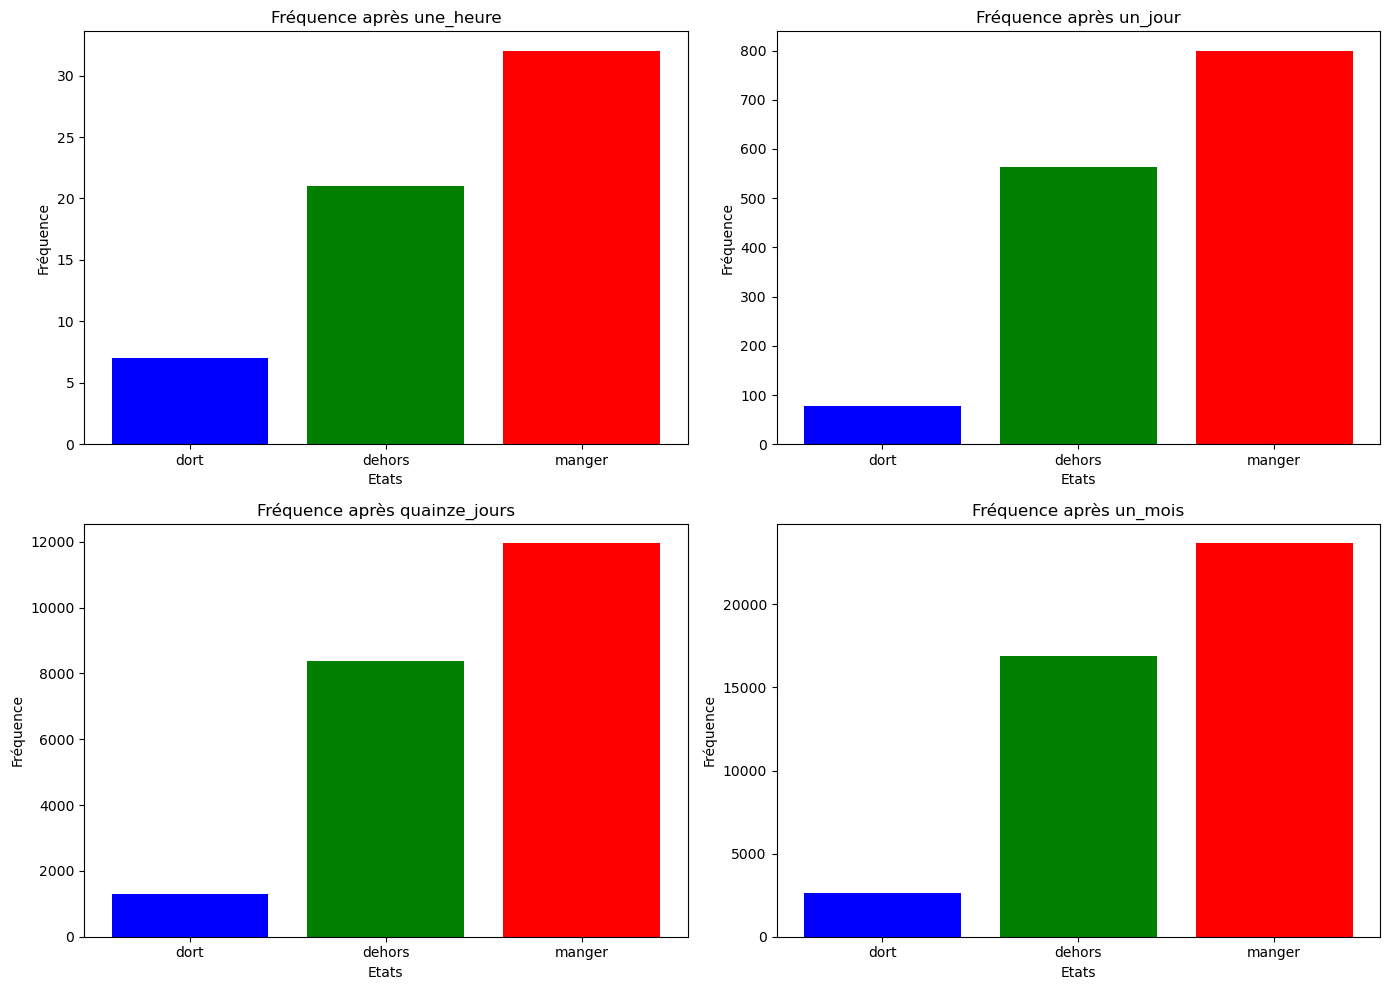

In [63]:
import matplotlib.pyplot as plt

histogram_data = {time_span: [state_history.count(state) for state in states.values()]
                  for time_span, state_history in simulations.items()}


state_labels = list(states.keys())


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten() 

for i, (time_span, data) in enumerate(histogram_data.items()):
    axes[i].bar(state_labels, data, color=['blue', 'green', 'red'])
    axes[i].set_title(f'Fréquence après {time_span}')
    axes[i].set_ylabel('Fréquence')
    axes[i].set_xlabel('Etats')


plt.tight_layout()
plt.show()


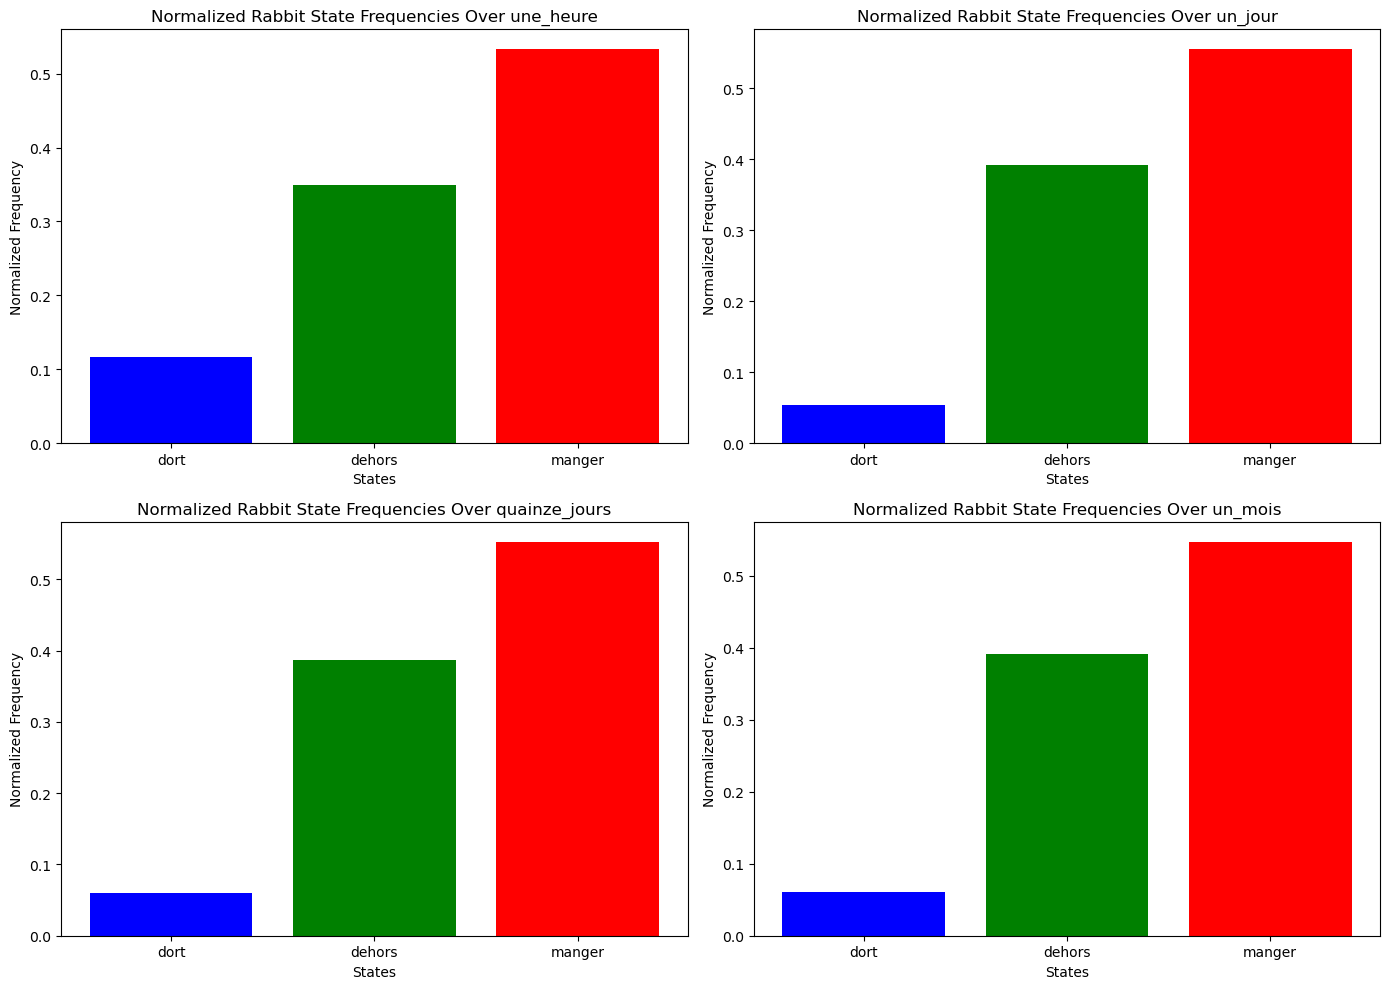

In [64]:
# Normalize histogram data by the number of components
normalized_histogram_data = {time_span: [state_history.count(state) / len(state_history)
                                          for state in states.values()]
                             for time_span, state_history in simulations.items()}

# Plot normalized histograms for each time span
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten the 2x2 grid into a 1D array for easy iteration

for i, (time_span, data) in enumerate(normalized_histogram_data.items()):
    axes[i].bar(state_labels, data, color=['blue', 'green', 'red'])
    axes[i].set_title(f'Normalized Rabbit State Frequencies Over {time_span}')
    axes[i].set_ylabel('Normalized Frequency')
    axes[i].set_xlabel('States')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
